In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from scipy.stats import zscore



In [2]:
file_paths = ["NF - I Miss The Days (Audio).wav", "NF & Sasha Sloan - Only.wav", "NF - Hate Myself (Audio).wav", "NF - Remember This (Audio).wav"]

def load_audio(file_path, sr=22050):
    audio, _ = librosa.load(file_path, sr=sr)
    return audio

def extract_features(audio, sr=22050):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    spectral_flux = librosa.onset.onset_strength(y=audio, sr=sr)
    return mfccs, spectral_centroid, zcr, spectral_flux

def compute_mfcc_and_indices(file_paths):
    features = {}
    for file_path in file_paths:
        audio = load_audio(file_path)
        mfccs, spectral_centroid, zcr, spectral_flux = extract_features(audio)
        features[file_path] = {
            'mfcc': mfccs,
            'spectral_centroid': spectral_centroid,
            'zcr': zcr,
            'spectral_flux': spectral_flux
        }
    return features


def segment_audio(mfcc, segment_length=10):
    num_segments = mfcc.shape[1] // segment_length
    segments = [mfcc[:, i*segment_length:(i+1)*segment_length] for i in range(num_segments)]
    return segments

def cluster_segments(segments):
    flattened_segments = [seg.flatten() for seg in segments]
    similarity_matrix = cosine_similarity(flattened_segments)
    clustering = DBSCAN(eps=0.3, min_samples=2).fit(similarity_matrix)
    return clustering.labels_

def calculate_tempo_and_energy(audio):
    tempo, _ = librosa.beat.beat_track(y=audio)
    energy = np.sum(audio ** 2) / len(audio)
    return tempo, energy


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Analyse Audio - MFCC et Indices Spectrales"),
    dcc.Dropdown(
        id="file-dropdown",
        options=[{'label': file, 'value': file} for file in file_paths],
        value=file_paths[0]
    ),
    dcc.Graph(id='mfcc-graph'),
    dcc.Graph(id='spectral-centroid-graph'),
    dcc.Graph(id='zcr-graph'),
    dcc.Graph(id='spectral-flux-graph'),
    dcc.Graph(id='refrain-cluster-graph'),
])

@app.callback(
    Output('mfcc-graph', 'figure'),
    Output('spectral-centroid-graph', 'figure'),
    Output('zcr-graph', 'figure'),
    Output('spectral-flux-graph', 'figure'),
    Output('refrain-cluster-graph', 'figure'),
    [Input('file-dropdown', 'value')]
)
def update_graph(file_path):
    mfccs, spectral_centroid, zcr, spectral_flux = features[file_path]['mfcc'], features[file_path]['spectral_centroid'], features[file_path]['zcr'], features[file_path]['spectral_flux']
    
    # Créer les graphiques pour chaque indice
    mfcc_fig = go.Figure(data=[go.Heatmap(z=mfccs)])
    spectral_centroid_fig = go.Figure(data=[go.Scatter(y=spectral_centroid.flatten())])
    zcr_fig = go.Figure(data=[go.Scatter(y=zcr.flatten())])
    spectral_flux_fig = go.Figure(data=[go.Scatter(y=spectral_flux.flatten())])

    # Segmenter l'audio et effectuer le clustering pour les refrains
    segments = segment_audio(mfccs)
    cluster_labels = cluster_segments(segments)
    
    refrain_fig = go.Figure(data=[go.Scatter(y=cluster_labels)])

    return mfcc_fig, spectral_centroid_fig, zcr_fig, spectral_flux_fig, refrain_fig

if __name__ == "__main__":
    features = compute_mfcc_and_indices(file_paths)
    app.run_server(debug=True)


In [18]:
file_paths = ["Machine Gun Kelly – Death In My Pocket (Official Audio).wav", "NF & Sasha Sloan - Only.wav", "NF - Hate Myself (Audio).wav", "NF - Remember This (Audio).wav"]

def load_audio(file_path, sr=22050):
    audio, _ = librosa.load(file_path, sr=sr)
    return audio

def extract_features(audio, sr=22050):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    spectral_flux = librosa.onset.onset_strength(y=audio, sr=sr)
    return mfccs, spectral_centroid, zcr, spectral_flux

def compute_mfcc_and_indices(file_paths):
    features = {}
    for file_path in file_paths:
        audio = load_audio(file_path)
        mfccs, spectral_centroid, zcr, spectral_flux = extract_features(audio)
        features[file_path] = {
            'mfcc': mfccs,
            'spectral_centroid': spectral_centroid,
            'zcr': zcr,
            'spectral_flux': spectral_flux
        }
    return features


def segment_audio(mfcc, segment_length=10):
    num_segments = mfcc.shape[1] // segment_length
    segments = [mfcc[:, i*segment_length:(i+1)*segment_length] for i in range(num_segments)]
    return segments

def cluster_segments(segments):
    flattened_segments = [seg.flatten() for seg in segments]
    similarity_matrix = cosine_similarity(flattened_segments)
    clustering = DBSCAN(eps=0.3, min_samples=2).fit(similarity_matrix)
    return clustering.labels_

def calculate_tempo_and_energy(audio):
    tempo, _ = librosa.beat.beat_track(y=audio)
    energy = np.sum(audio ** 2) / len(audio)
    return tempo, energy


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Analyse Audio - MFCC et Indices Spectrales"),
    dcc.Dropdown(
        id="file-dropdown",
        options=[{'label': file, 'value': file} for file in file_paths],
        value=file_paths[0]
    ),
    dcc.Graph(id='mfcc-graph'),
    dcc.Graph(id='spectral-centroid-graph'),
    dcc.Graph(id='zcr-graph'),
    dcc.Graph(id='spectral-flux-graph'),
    dcc.Graph(id='refrain-cluster-graph'),
])

@app.callback(
    Output('mfcc-graph', 'figure'),
    Output('spectral-centroid-graph', 'figure'),
    Output('zcr-graph', 'figure'),
    Output('spectral-flux-graph', 'figure'),
    Output('refrain-cluster-graph', 'figure'),
    [Input('file-dropdown', 'value')]
)
def update_graph(file_path):
    mfccs, spectral_centroid, zcr, spectral_flux = features[file_path]['mfcc'], features[file_path]['spectral_centroid'], features[file_path]['zcr'], features[file_path]['spectral_flux']
    
    # Créer les graphiques pour chaque indice
    mfcc_fig = go.Figure(data=[go.Heatmap(z=mfccs)])
    spectral_centroid_fig = go.Figure(data=[go.Scatter(y=spectral_centroid.flatten())])
    zcr_fig = go.Figure(data=[go.Scatter(y=zcr.flatten())])
    spectral_flux_fig = go.Figure(data=[go.Scatter(y=spectral_flux.flatten())])

    # Segmenter l'audio et effectuer le clustering pour les refrains
    segments = segment_audio(mfccs)
    cluster_labels = cluster_segments(segments)
    
    refrain_fig = go.Figure(data=[go.Scatter(y=cluster_labels)])

    return mfcc_fig, spectral_centroid_fig, zcr_fig, spectral_flux_fig, refrain_fig

if __name__ == "__main__":
    features = compute_mfcc_and_indices(file_paths)
    app.run_server(debug=True)


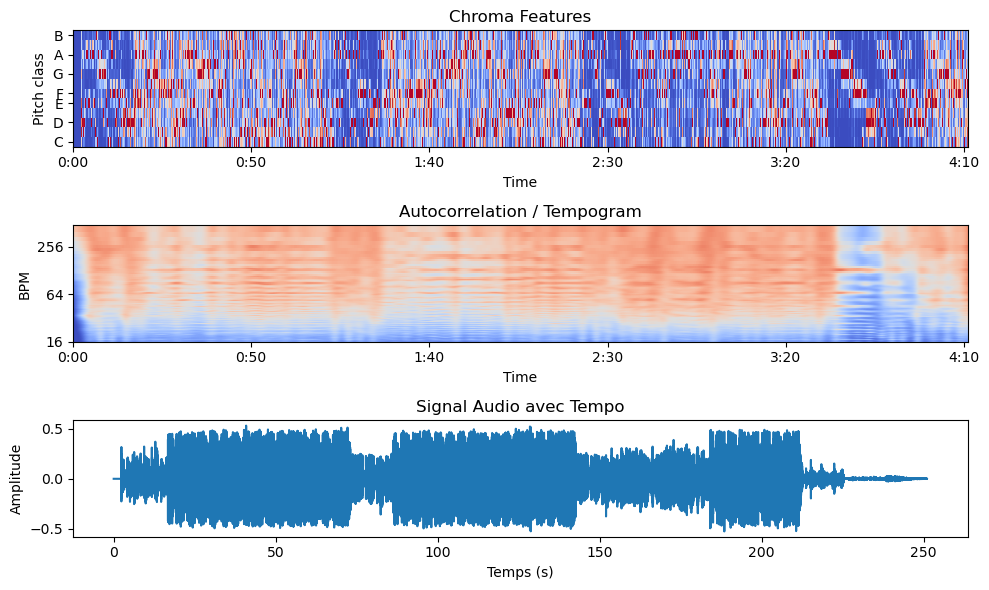

Tempo estimé: [135.99917763] BPM


In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Chargement de l'audio
filename = 'NF & Sasha Sloan - Only.wav'
y, sr = librosa.load(filename)

# Calcul du spectrogramme de fréquence et des Chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Calcul de l'autocorrélation pour détecter la répétition
autocorr = librosa.effects.harmonic(y)
autocorr = librosa.feature.tempogram(y=autocorr, sr=sr)

# Visualisation du Chroma Features, Tempogram et Beat
plt.figure(figsize=(10, 6))

# Visualisation des Chroma features
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.title('Chroma Features')

# Visualisation de l'Autocorrelation / Tempogram
plt.subplot(3, 1, 2)
librosa.display.specshow(autocorr, y_axis='tempo', x_axis='time', cmap='coolwarm')
plt.title('Autocorrelation / Tempogram')

# Visualisation du Tempo
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Signal Audio avec Tempo')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Afficher les résultats du Tempo
print(f"Tempo estimé: {tempo} BPM")
